# Marketing Analytics
## 2-Visuals for Marketers


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Separating the Metric and categorical data for advertising

In [ ]:
Q1df = pd.read_csv("advertising_events.csv")


# Identify metric columns (excluding 'uid')
metric_columns = Q1df.select_dtypes(include=np.number).columns
metric_columns = metric_columns[metric_columns != 'uid']

metric_stats = Q1df[metric_columns].describe()
metric_stats

,NumVisits
count,10341.000000
mean,1.515714
std,1.116203
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


Printing a Frequency table

In [ ]:
categorical_columns = Q1df.select_dtypes(include='object').columns
categorical_columns = list(categorical_columns) + ['uid']

# Display frequency table for each categorical variable (including 'uid' intentionally)
for column in categorical_columns:
    frequency_table = Q1df[column].value_counts()
    print(f"\nFrequency Table for {column}:\n{frequency_table}")


Frequency Table for Domain:
google.com       3114
facebook.com     2092
youtube.com      1036
yahoo.com        1034
baidu.com        1022
wikipedia.org     513
amazon.com        511
qq.com            382
twitter.com       321
taobao.com        316
Name: Domain, dtype: int64

Frequency Table for uid:
184    29
2      26
659    26
114    26
101    25
       ..
185     6
711     6
508     6
277     5
644     4
Name: uid, Length: 732, dtype: int64


Bar plot for the Frequency Table


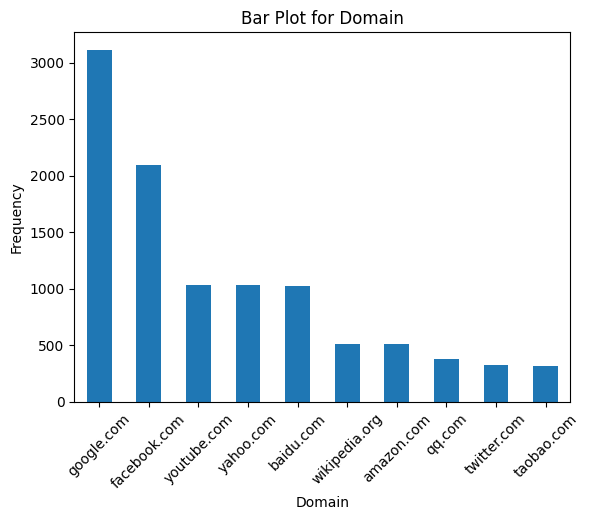

In [ ]:
categorical_columns = Q1df.select_dtypes(include='object').columns

for column in categorical_columns:
    frequency_table = Q1df[column].value_counts()
    # bar plot (excluding 'uid')
    if column != 'uid':
        frequency_table.plot(kind='bar', rot=45, title=f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

### Importing US marriages and divorce data

In [ ]:
us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2011.csv')
years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

Plotting the number of marriages and divorces per capita in the U.S. between 1867 and 2011

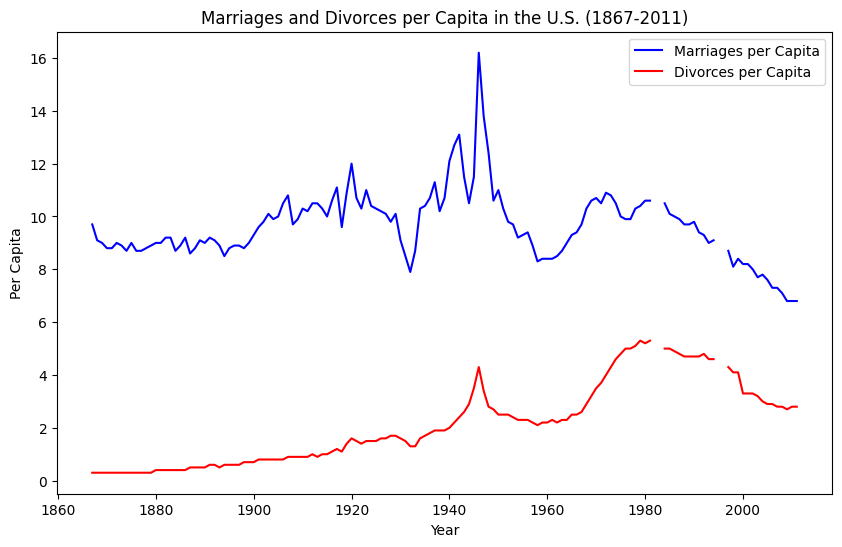

In [ ]:
# Make the plots
plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_capita, label='Marriages per Capita', color='blue')
plt.plot(years, divorces_per_capita, label='Divorces per Capita', color='red')

# Labels,Title,Legend ... etc
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2011)')
plt.legend()

plt.show()

Using Subplots instead

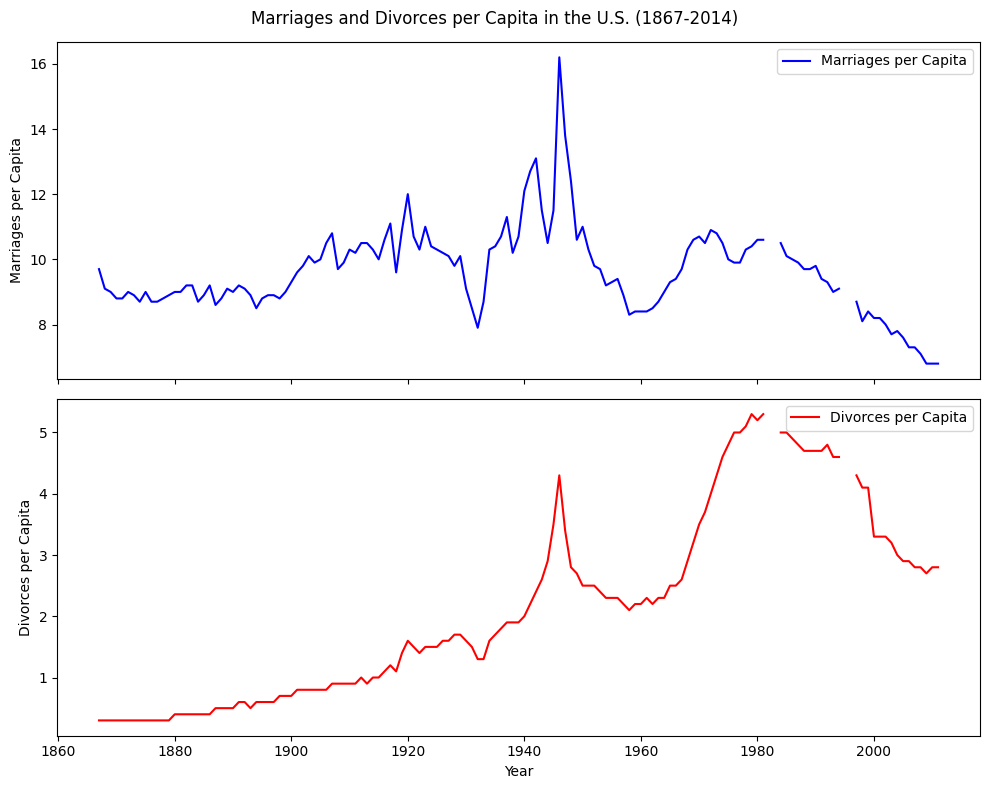

In [ ]:
# Initialize subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# marriages per capita
ax1.plot(years, marriages_per_capita, label='Marriages per Capita', color='blue')
ax1.set_ylabel('Marriages per Capita')

# divorces per capita
ax2.plot(years, divorces_per_capita, label='Divorces per Capita', color='red')
ax2.set_ylabel('Divorces per Capita')

# Labels, Title, Legend ... etc
plt.xlabel('Year')
plt.suptitle('Marriages and Divorces per Capita in the U.S. (1867-2014)')
ax1.legend()
ax2.legend()

plt.tight_layout() #just make it nice & tight
plt.show()

Here is a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

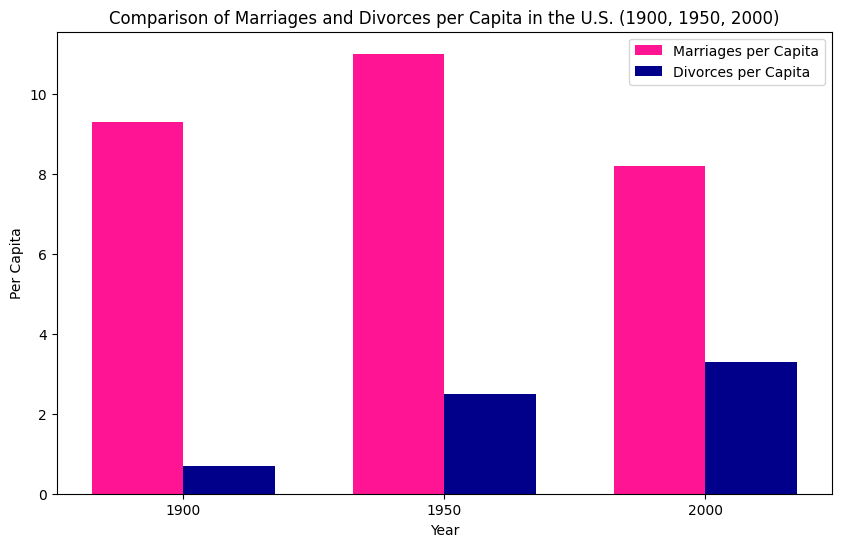

In [ ]:
# Filter
three_years_data = us_marriage_divorce_data[us_marriage_divorce_data['Year'].isin([1900, 1950, 2000])]

# Extract relevant variables
three_years = three_years_data['Year'].values
marriages_per_capita_relevant = three_years_data['Marriages_per_1000'].values
divorces_per_capita_relevant = three_years_data['Divorces_per_1000'].values

# bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(three_years))

plt.bar(index, marriages_per_capita_relevant, width=bar_width, label='Marriages per Capita', color='deeppink')
plt.bar([i + bar_width for i in index], divorces_per_capita_relevant, width=bar_width, label='Divorces per Capita', color='darkblue')

# Labels,title,legend ... etc
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([i + bar_width/2 for i in index], three_years)
plt.legend()

plt.show()

### Importing Hollywood actor kill count data (in cinema)

In [ ]:
hollywood_actor_kills = pd.read_csv('data/actor_kill_counts.csv')
actor_names = hollywood_actor_kills['Actor'].values
kill_counts = hollywood_actor_kills['Count'].values

Visualizing through a horizontal bar chart

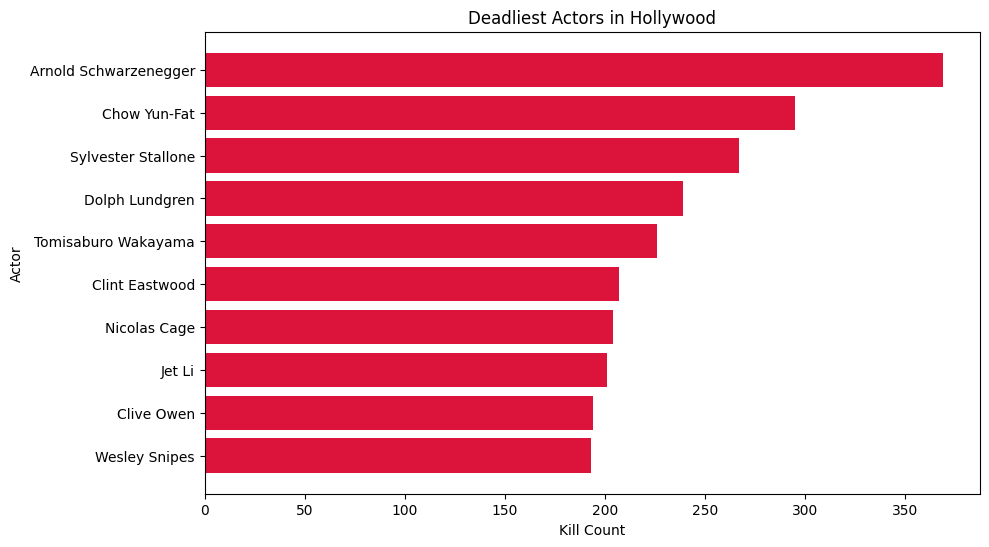

In [ ]:
# Sort
sorted_indices = kill_counts.argsort() #get the indices to save time
sorted_actor_names = actor_names[sorted_indices]
sorted_kill_counts = kill_counts[sorted_indices]

#Bar chart (h=horizontal)
plt.figure(figsize=(10, 6))
plt.barh(sorted_actor_names, sorted_kill_counts, color='crimson') #red for kills :)

# Labels,title .. etc
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display the plot
plt.show()

### Importing recent college graduates earnings data

we analyze the feature "ShareWomen" to find which majors are male or female dominated

In [ ]:
college_major_earnings = pd.read_csv('data/recent-college-grads-earnings.csv')
more_men_earnings = college_major_earnings[
    college_major_earnings['ShareWomen'] < 0.5]['Median'].values #List of the Median earnings of Majors where there is more men

more_women_earnings = college_major_earnings[
    college_major_earnings['ShareWomen'] > 0.5]['Median'].values #List of the Median earnings of Majors where there is more women

In [ ]:
pd.set_option('display.max_columns', 25)
college_major_earnings.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [ ]:
male_dominated_majors = college_major_earnings[college_major_earnings['ShareWomen'] < 0.5][['Major', 'Major_category','Median','ShareWomen']]
female_dominated_majors = college_major_earnings[college_major_earnings['ShareWomen'] >= 0.5][['Major', 'Major_category','Median','ShareWomen']]
male_dominated_majors

,Major,Major_category,Median,ShareWomen
0,PETROLEUM ENGINEERING,Engineering,110000,0.120564
1,MINING AND MINERAL ENGINEERING,Engineering,75000,0.101852
2,METALLURGICAL ENGINEERING,Engineering,73000,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,0.107313
4,CHEMICAL ENGINEERING,Engineering,65000,0.341631
...,...,...,...,...
135,PHILOSOPHY AND RELIGIOUS STUDIES,Humanities & Liberal Arts,32200,0.416810
141,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,32000,0.423209
143,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,32000,0.339671
147,PHYSICAL AND HEALTH EDUCATION TEACHING,Education,31000,0.444582


In [ ]:
female_dominated_majors

,Major,Major_category,Median,ShareWomen
7,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,62000,0.535714
29,PUBLIC POLICY,Law & Public Policy,50000,0.558548
34,NURSING,Health,48000,0.896019
39,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",Physical Sciences,46000,0.750473
40,ACCOUNTING,Business,45000,0.524153
...,...,...,...,...
168,ZOOLOGY,Biology & Life Science,26000,0.637293
169,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,25000,0.817099
170,CLINICAL PSYCHOLOGY,Psychology & Social Work,25000,0.799859
171,COUNSELING PSYCHOLOGY,Psychology & Social Work,23400,0.798746


Through box plots we compare the earnings of recent college graduates in majors that are primarily composed of women to the earnings of recent college graduates in majors that are primarily composed of men

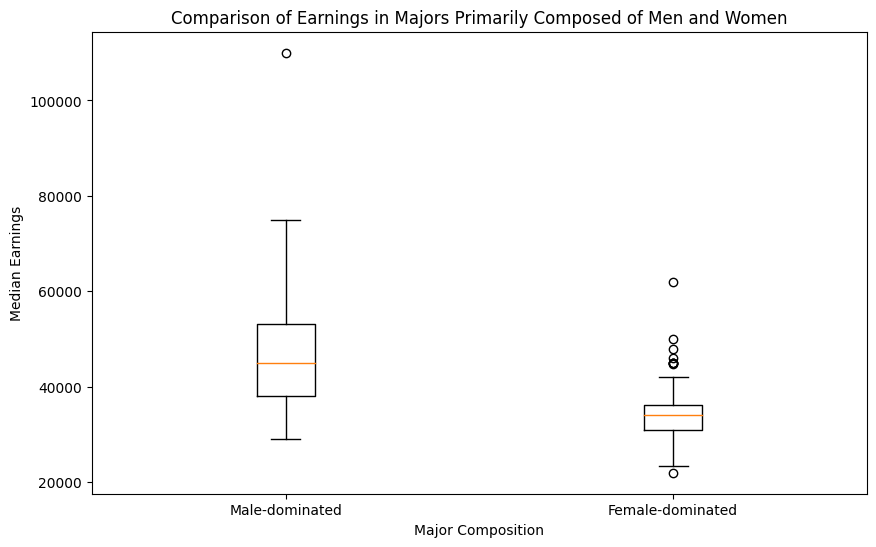

In [ ]:
# box plots
plt.figure(figsize=(10, 6))
plt.boxplot([more_men_earnings, more_women_earnings], labels=['Male-dominated', 'Female-dominated'])

# Labels,title .. etc
plt.xlabel('Major Composition')
plt.ylabel('Median Earnings')
plt.title('Comparison of Earnings in Majors Primarily Composed of Men and Women')

# Display the plot
plt.show()

With a histogram we show the distribution of earnings

With bar plots we compare the average earnings between engineering and business school, for majors that are primarily composed of men versus women.

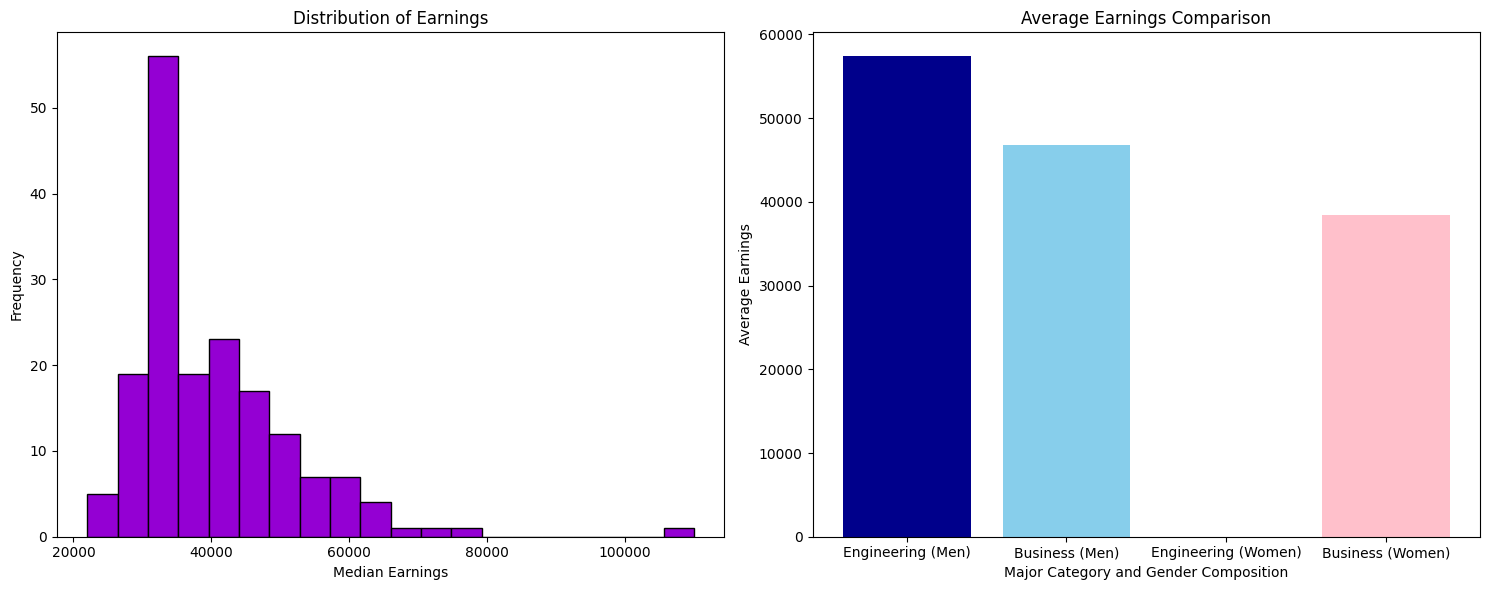

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 1: Histogram earnings
axes[0].hist(college_major_earnings['Median'], bins=20, color='darkviolet', edgecolor='black')
axes[0].set_title('Distribution of Earnings')
axes[0].set_xlabel('Median Earnings')
axes[0].set_ylabel('Frequency')

# 2: Bar plot mean earnings between engineering vs business * male-dominated vs female-dominated
engineering_men = college_major_earnings[(college_major_earnings['Major_category'] == 'Engineering') & (college_major_earnings['ShareWomen'] < 0.5)]['Median'].mean()
business_men = college_major_earnings[(college_major_earnings['Major_category'] == 'Business') & (college_major_earnings['ShareWomen'] < 0.5)]['Median'].mean()
engineering_women = college_major_earnings[(college_major_earnings['Major_category'] == 'Engineering') & (college_major_earnings['ShareWomen'] >= 0.5)]['Median'].mean()
business_women = college_major_earnings[(college_major_earnings['Major_category'] == 'Business') & (college_major_earnings['ShareWomen'] >= 0.5)]['Median'].mean()

categories = ['Engineering (Men)', 'Business (Men)', 'Engineering (Women)', 'Business (Women)']
earnings = [engineering_men, business_men, engineering_women, business_women]

axes[1].bar(categories, earnings, color=['darkblue', 'skyblue', 'red', 'pink'])
axes[1].set_title('Average Earnings Comparison')
axes[1].set_ylabel('Average Earnings')
axes[1].set_xlabel('Major Category and Gender Composition')


plt.tight_layout()
plt.show()
